<a href="https://colab.research.google.com/github/hazal-hk/akbank-veri-analizi-bootcamp/blob/main/Adult_Income_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INTRODUCTION

**Import Libraries**

In [1]:
import warnings
warnings.filterwarnings('ignore')

# ************** DATA MANIPULATION *****************

import pandas as pd
import numpy as np

# ************** DATA VISUALIZATION ****************

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression

# ************* METRICS ****************************

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

sns.set(style='white', context='notebook')

**Load and Check Data**

In [2]:
df = pd.read_csv("/adult.csv")

**Veri Setini İnceleme**

In [3]:
def check_df(dataframe):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("\n##################### Columns #####################")
    print(dataframe.columns)
    print("\n##################### Info #####################")
    dataframe.info()
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head())
    print("##################### Tail #####################")
    print(dataframe.tail())
    print("##################### NA #####################")
    print(dataframe.isnull().sum())

In [4]:
check_df(df)

##################### Shape #####################
(32561, 15)

##################### Columns #####################
Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

##################### Info #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-nul

In [5]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Variable Description

**Age**: Describes the age of individuals. Continuous.

**Workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

**fnlwgt**: Continuous.

**education:** Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

**education-num:** Number of years spent in education. Continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

**occupation:** Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

**relationship:** Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

**race:** White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

**sex: **Female, Male.

**capital-gain:** Continuous.

**capital-loss:** Continuous.

**hours-per-week**: Continuous.

**native-country:** United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

**salary:** >50K,<=50K

Univarite Variable Analysis

In [6]:
def column_detection(dataframe: pd.DataFrame, cat_th: int = 10, car_th: int = 20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                       dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                    dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print("\n##################### Categoric #####################")
    print(cat_cols)
    print("\n##################### Numeric #####################")
    print(num_cols)
    print("\n##################### Categoric But Cardinal #####################")
    print(cat_but_car)
    print("\n##################### Numeric But Categoric #####################")
    print(num_but_cat)
    print("\n##################### Columns Overview #####################")
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car, num_but_cat

In [7]:
cat_cols, num_cols, cat_but_car, num_but_cat = column_detection(df)


##################### Categoric #####################
['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'income']

##################### Numeric #####################
['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

##################### Categoric But Cardinal #####################
['native.country']

##################### Numeric But Categoric #####################
[]

##################### Columns Overview #####################
Observations: 32561
Variables: 15
cat_cols: 8
num_cols: 6
cat_but_car: 1
num_but_cat: 0


Kategorik ve Sayısal Değişkenlerin Görselleştirilmesi

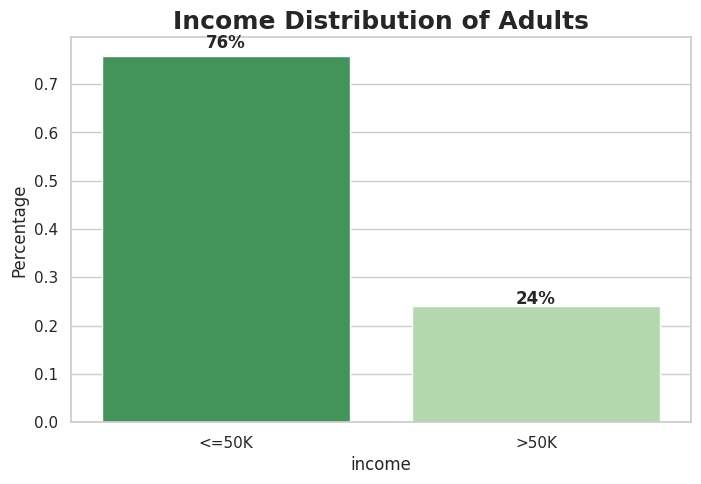

In [10]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Income Distribution of Adults', fontsize=18, fontweight='bold')
eda_percentage = df['income'].value_counts(normalize = True).rename_axis('income').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'income', y = 'Percentage', data = eda_percentage.head(10), palette='Greens_r')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

In [14]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

df['age_group'] = df['age'].apply(age_group)

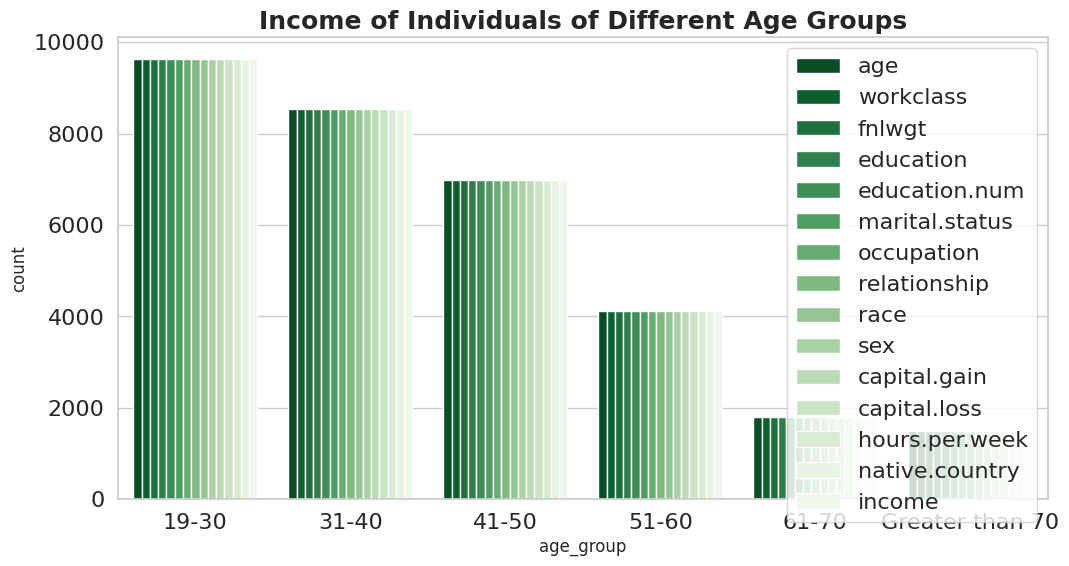

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert income to a categorical variable
df['income'] = pd.Categorical(df['income'])

# Convert the data to a long format
df_long = pd.melt(df, id_vars=['age_group'], var_name='income')

# Create the countplot
plt.figure(figsize=(12, 6))
order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(data=df_long, x='age_group', hue='income', palette='Greens_r', order=order_list)
plt.title('Income of Individuals of Different Age Groups', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

In [16]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

df['age_group'] = df['age'].apply(age_group)

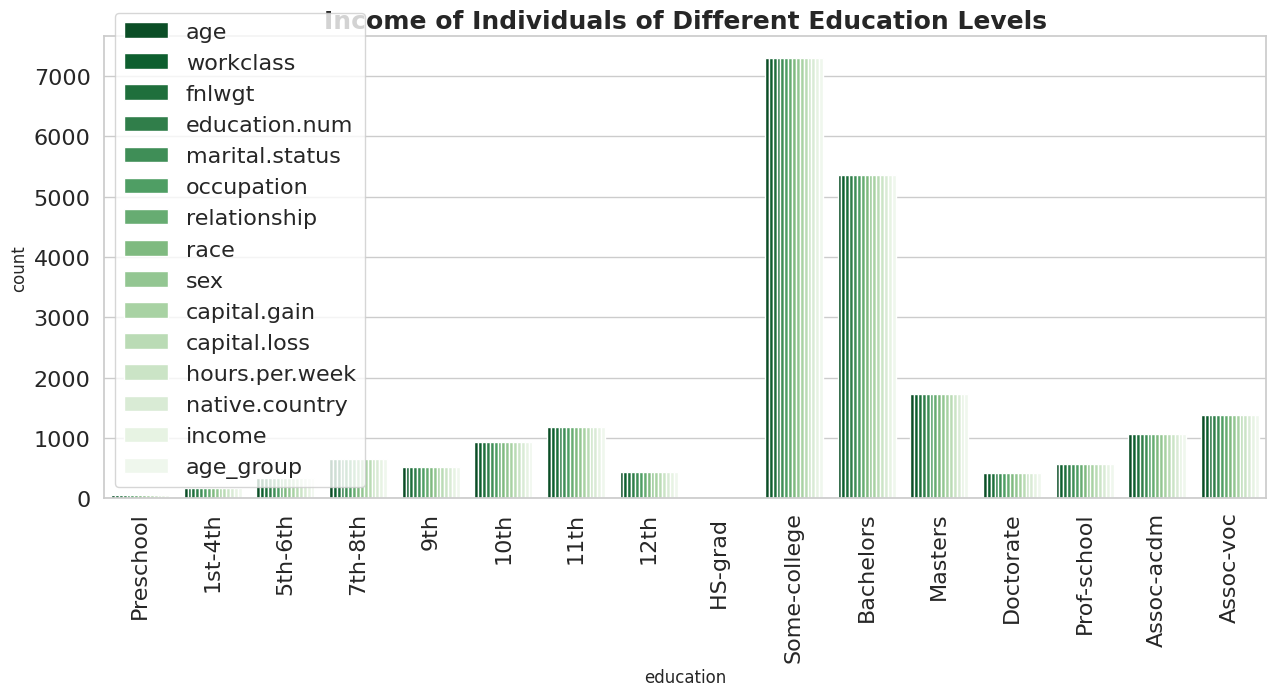

In [17]:
# Convert the data to a long format
df_long = pd.melt(df, id_vars=['education'], var_name='income')

# Create the countplot
plt.figure(figsize=(15,6))
order_list = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th',
                'HS-grad ', 'Some-college', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school',
              'Assoc-acdm', 'Assoc-voc']
sns.countplot(data=df_long, x='education', hue='income', palette='Greens_r', order= order_list)
plt.title('Income of Individuals of Different Education Levels', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

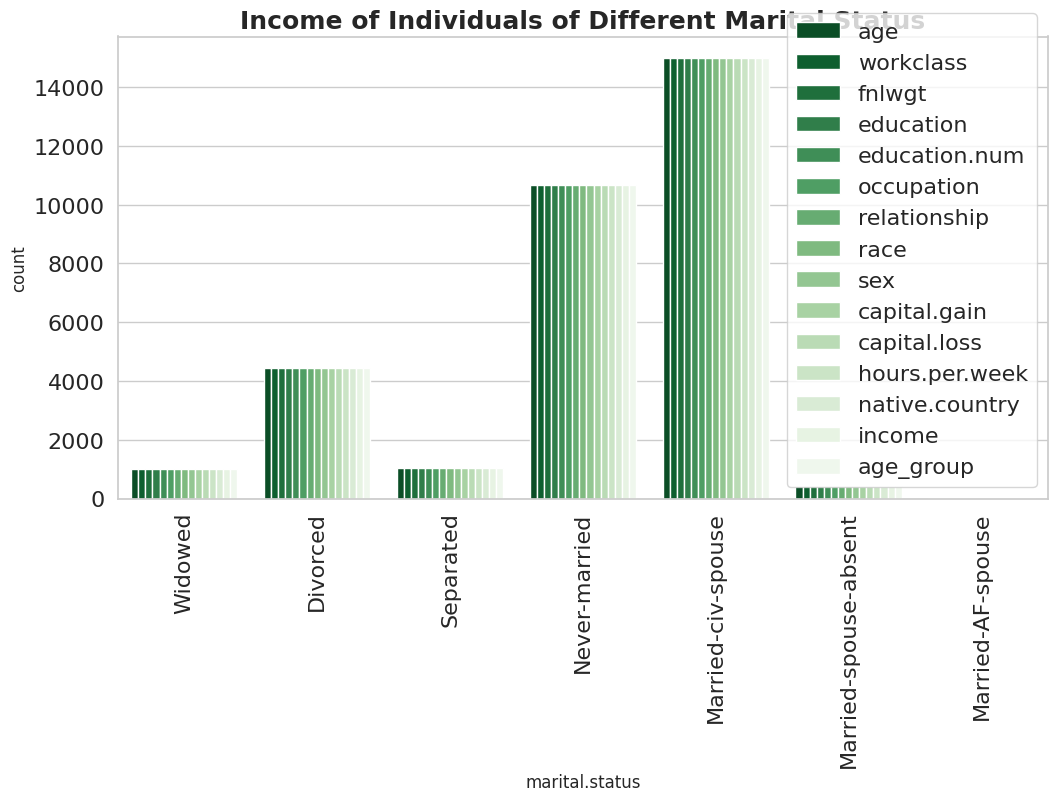

In [18]:
# Melt the dataframe to convert it to a long format
df_long = pd.melt(df, id_vars=['marital.status'], var_name='income')

# Create the countplot
plt.figure(figsize=(12,6))
sns.countplot(data=df_long, x='marital.status', hue='income', palette='Greens_r')
plt.title('Income of Individuals of Different Marital Status', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

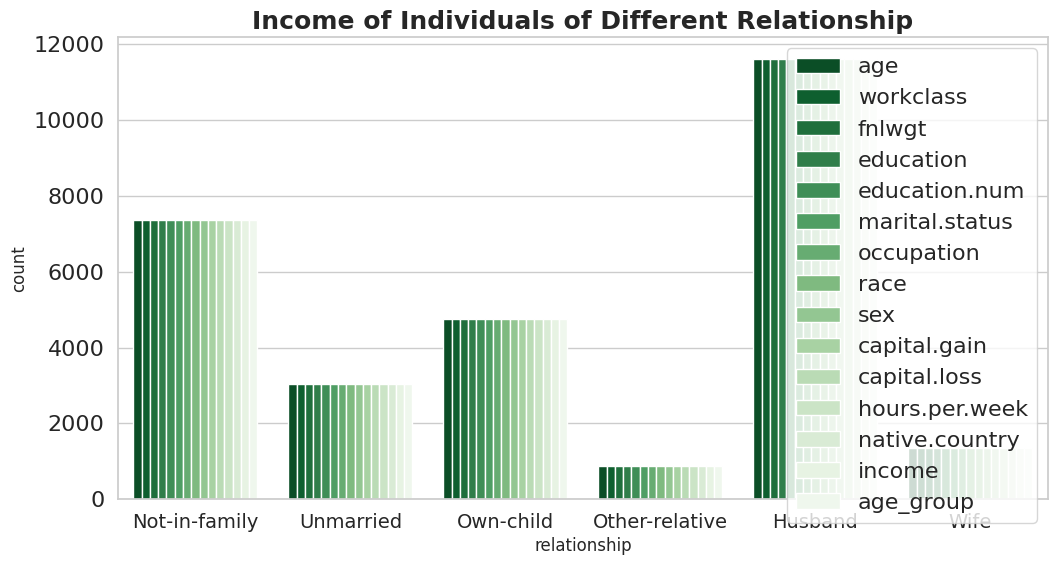

In [27]:
# Convert the data to a long format
df_long = pd.melt(df, id_vars=['relationship'], var_name='income')

# Create the countplot
plt.figure(figsize=(12,6))
sns.countplot(data=df_long, x='relationship', hue='income', palette='Greens_r')
plt.title('Income of Individuals of Different Relationship', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

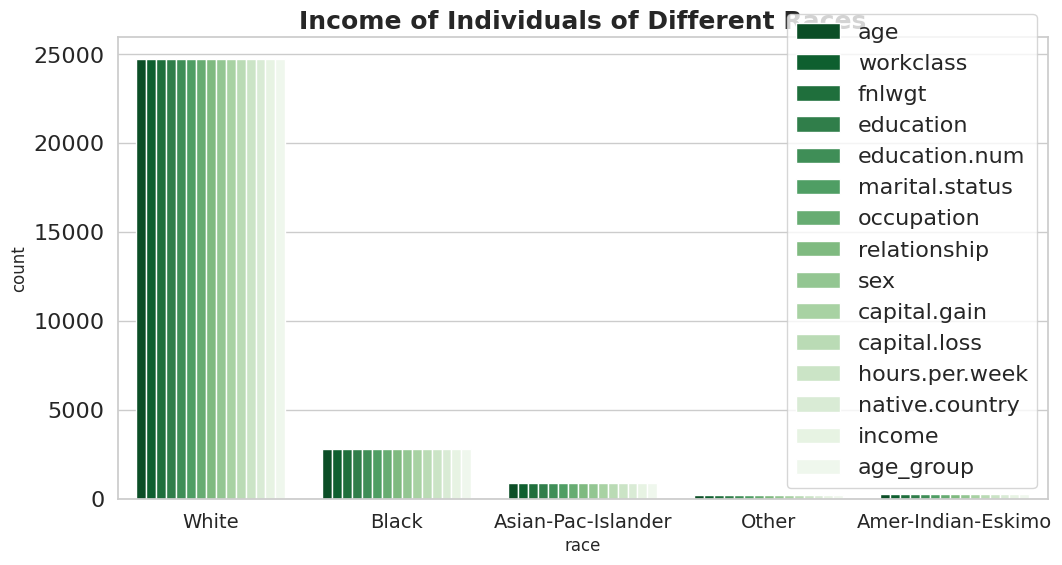

In [28]:
# Convert the data to a long format
df_long = pd.melt(df, id_vars=['race'], var_name='income')

# Create the countplot
plt.figure(figsize=(12,6))
sns.countplot(data=df_long, x='race', hue='income', palette='Greens_r')
plt.title('Income of Individuals of Different Races', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

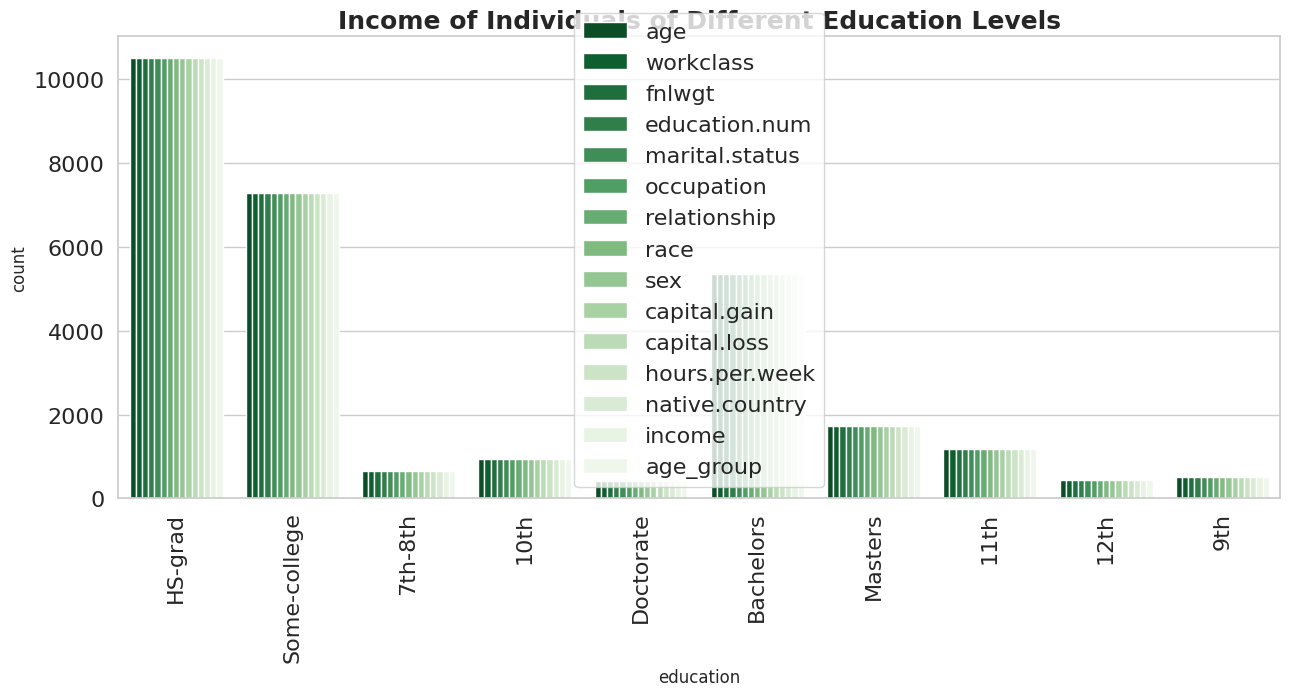

In [32]:
# Convert the data to a long format
df_long = pd.melt(df, id_vars=['education'], var_name='income')

# Create the countplot
plt.figure(figsize=(15,6))
sns.countplot(data=df_long, x='education', hue='income', palette='Greens_r')
plt.title('Income of Individuals of Different Education Levels', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

In [33]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1})

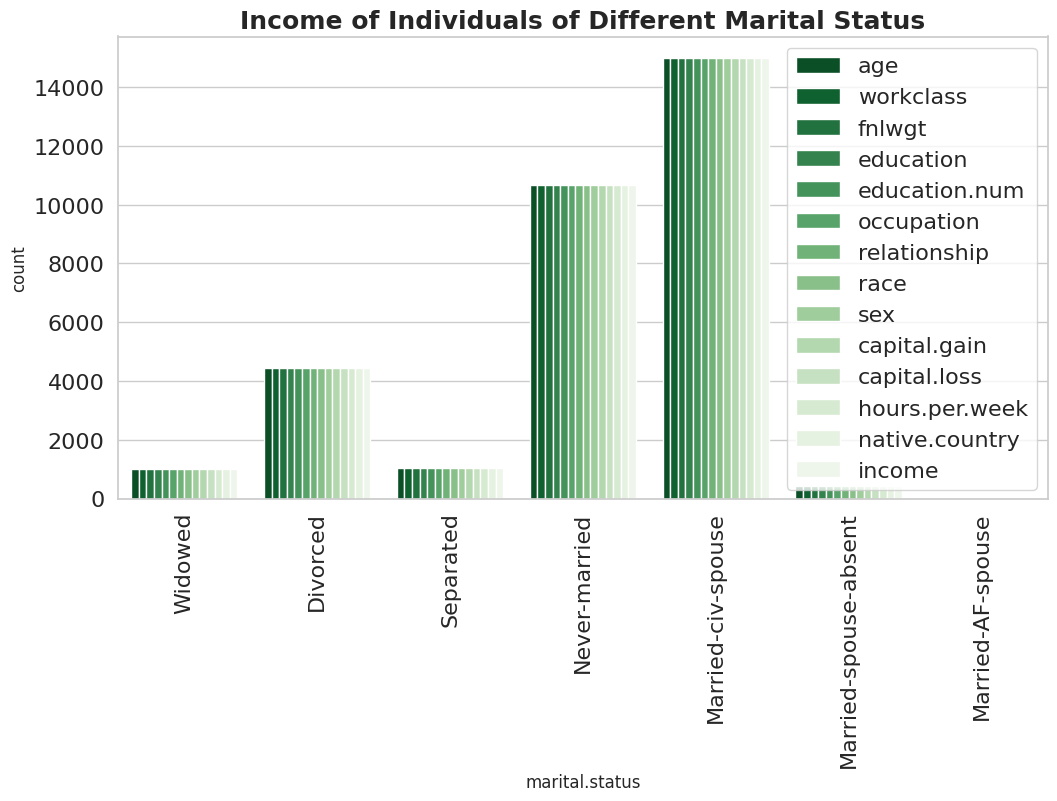

In [36]:
# Convert the data to a long format
df_long = pd.melt(df, id_vars=['marital.status'], var_name='income')

# Create the countplot
plt.figure(figsize=(12,6))
sns.countplot(data=df_long, x='marital.status', hue='income', palette='Greens_r')
plt.title('Income of Individuals of Different Marital Status', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

In [38]:
df_long = pd.melt(df, id_vars=['occupation'], var_name='income')


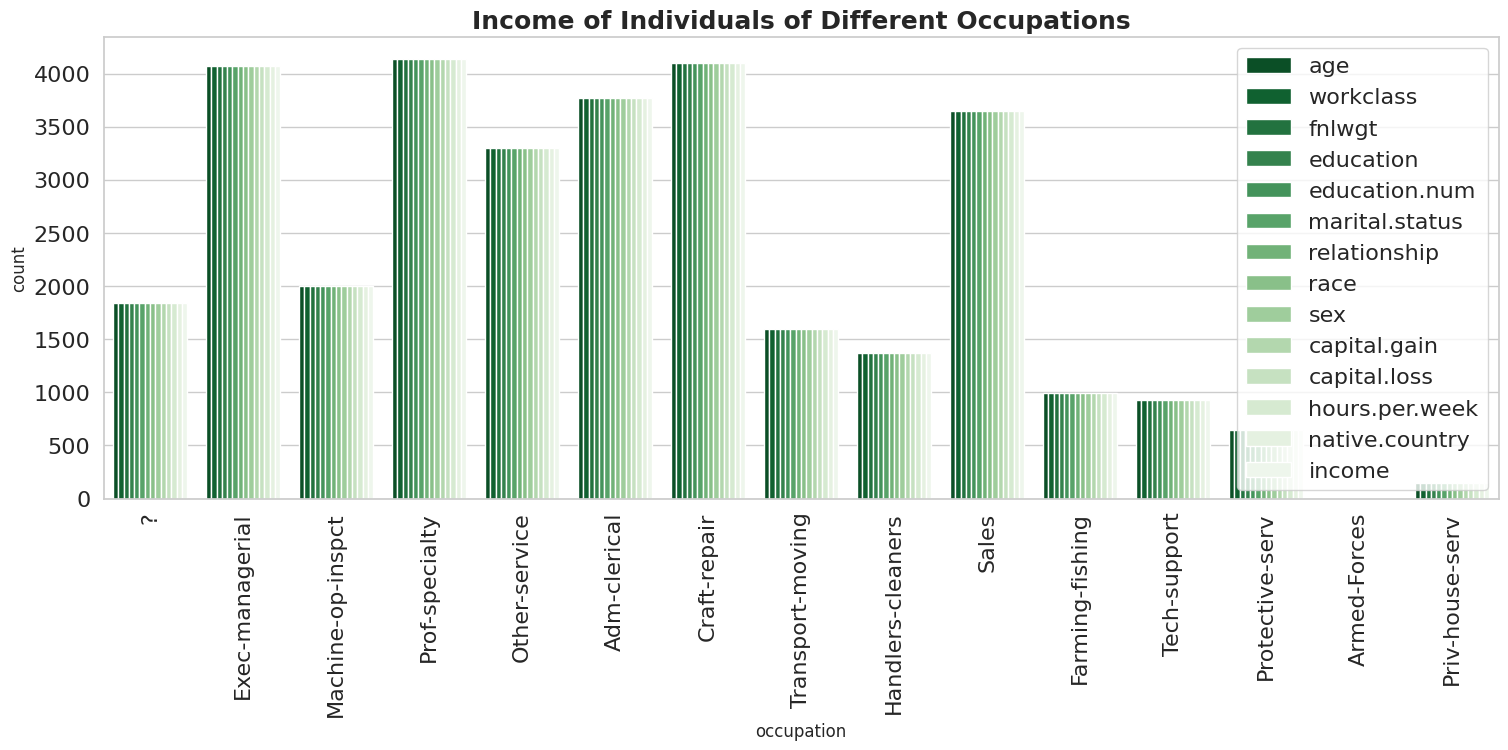

In [39]:
plt.figure(figsize=(18,6))
sns.countplot(data=df_long, x='occupation', hue='income', palette='Greens_r')
plt.title('Income of Individuals of Different Occupations', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

In [40]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1})

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')


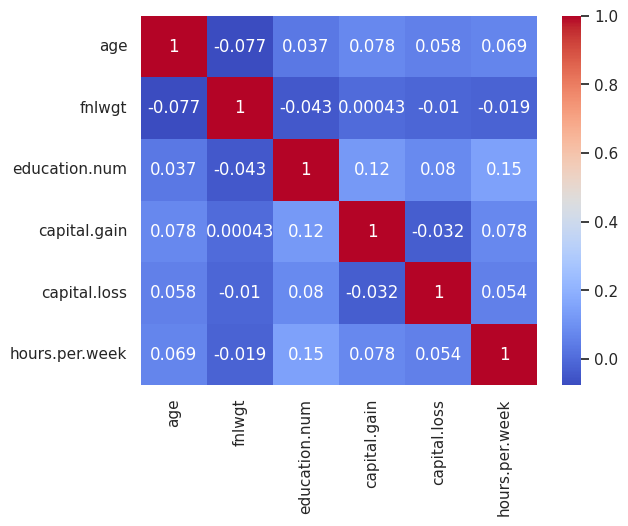

In [42]:
# Load the data into a pandas DataFrame
df = pd.read_csv('/adult.csv')

# Rename the columns to remove hyphens
df.rename(columns={
    'education-num': 'education.num',
    'capital-gain': 'capital.gain',
    'capital-loss': 'capital.loss',
    'hours-per-week': 'hours.per.week'
}, inplace=True)

# Check the column names of the DataFrame
print(df.columns)

# Calculate the correlation matrix using the correct column names
corr_matrix = df[['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']].corr()

# Create a heatmap from the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()